# Fashion MNIST classification with CNN

**Description:** Implementing the CNN model for image classification.

In [1]:
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)= keras.datasets.fashion_mnist.load_data()
x_train.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [3]:
y_train=y_train.reshape(-1,)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [4]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
def plot_sample(x,y,index):
#to control size of the image
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[index])

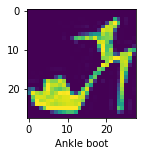

In [6]:
plot_sample(x_train,y_train,9)

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
cnn = keras.Model(inputs=inputs, outputs=outputs)

In [15]:
cnn.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fashion_mnist_64_api.keras",
        save_best_only=True,
        monitor="val_loss")
]
history= cnn.fit(x_train, y_train, validation_split=0.1, epochs=30,callbacks=callbacks)

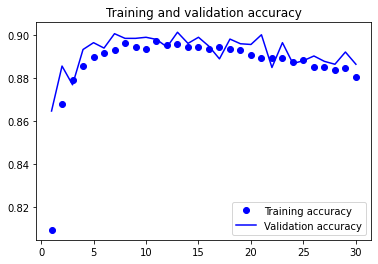

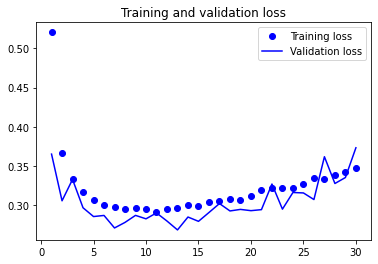

In [17]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("fashion_mnist_64_api.keras")
test_loss, test_acc = test_model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc:.3f}")


Original label is Trouser and predicted label is Trouser


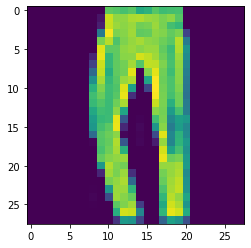

In [ ]:
labels = '''T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle_boot'''.split()
 
# select the image from our test dataset
image_number = 5
 
# display the image
plt.imshow(x_test[image_number])
 
# load the image in an array
n = np.array(x_test[image_number])
 
# reshape it
p = n.reshape(1, 28, 28, 1)
 
# pass in the network for prediction and
# save the predicted label
predicted_label = labels[cnn.predict(p).argmax()]
 
# load the original label
original_label = labels[y_test[image_number]]
 
# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))
